In [7]:
%load_ext autoreload
%autoreload 2

import numpy as np
import numba as nb
from scipy import stats
from scipy import optimize

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.optimize import minimize
import pandas as pd
import seaborn as sns

np.set_printoptions(suppress=True, precision=6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from breakdown_uncertainty_me_tax import SimpleBreakdownModelClass

# Base model

In [9]:
base_model = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
base_model_c = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.018,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1}) 

In [10]:
par = base_model.par
sol = base_model.sol
sim = base_model.sim

In [11]:
%time base_model_c.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 53s, sys: 7.04 s, total: 9min
Wall time: 11min 55s


In [12]:
%time base_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 8s, sys: 4.86 s, total: 8min 13s
Wall time: 10min 14s


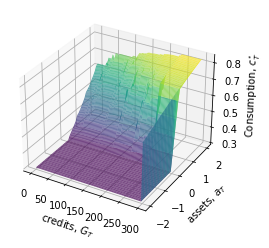

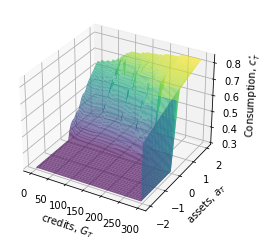

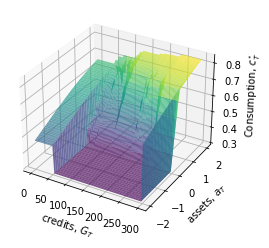

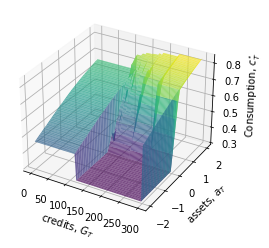

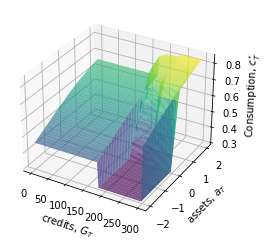

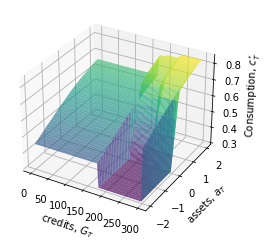

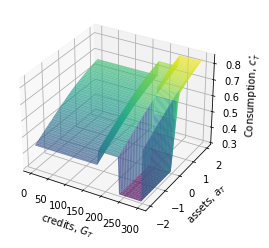

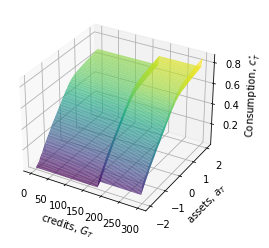

In [13]:
# consumption while studying
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

for t in range(par.T-49,par.T-42):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(G_mesh, a_mesh, sol.c[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
    ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

#consumption period 31
t = par.T-31

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot_surface(G_mesh, a_mesh, sol.c[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Consumption, $c_{T}^{\star}$');

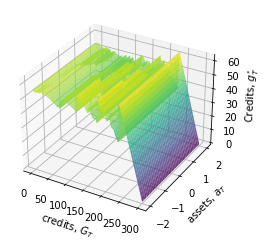

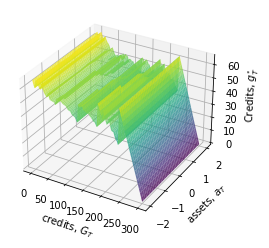

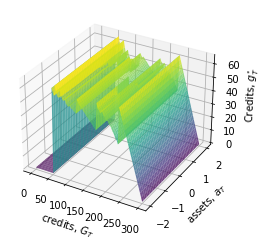

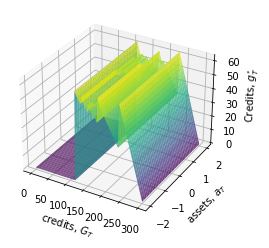

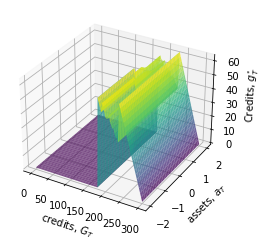

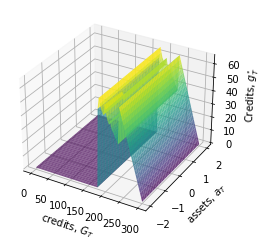

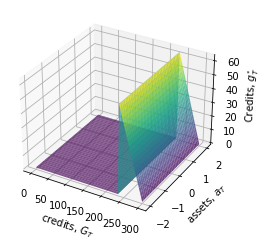

In [14]:
# ects while studying
a_mesh, G_mesh = np.meshgrid(par.a_grid,par.G_grid,indexing='ij')

for t in range(par.T-49,par.T-42):
    fig = plt.figure()
    ax = plt.axes(projection='3d')

    ax.plot_surface(G_mesh, a_mesh, sol.g[t,2,:,:],rstride=1,cstride=1,cmap='viridis', edgecolor='none',alpha=0.75);
    ax.set(xlabel='credits, $G_{T}$',ylabel='assets, $a_T$',zlabel='Credits, $g_{T}^{\star}$');

### Simulation

In [15]:
base_model_sim = base_model.copy()

#base_model_sim.sim.m_init[:] = 0
base_model_sim.sim.a_init[:] = 0.0
base_model_sim.sim.e_init[:] = 0
base_model_sim.simulate()

In [16]:
base_model_sim_c = base_model_c.copy()

#base_model_sim.sim.m_init[:] = 0
base_model_sim_c.sim.a_init[:] = 0.0
base_model_sim_c.sim.e_init[:] = 0
base_model_sim_c.simulate()

In [17]:
sim_a_list_c = np.around(np.mean(base_model_sim_c.sim.a,axis=0),decimals=3)

In [18]:
print(sim_a_list_c)

[ 0.    -0.    -0.    -0.    -0.001 -0.001  0.005 -0.024  0.005  0.035
  0.064  0.095  0.127  0.159  0.192  0.225  0.258  0.292  0.327  0.362
  0.397  0.431  0.464  0.485  0.503  0.519  0.531  0.542  0.55   0.558
  0.563  0.567  0.569  0.57   0.569  0.566  0.561  0.555  0.547  0.539
  0.528  0.514  0.498  0.477  0.452  0.418  0.377  0.318  0.17 ]


In [23]:
sim_a_list = np.around(np.mean(base_model_sim.sim.a,axis=0),decimals=2)
sim_a_list[0:7] = sim_a_list_c[0:7]
#sim_a_list[5] = sim_a_list[4]
#sim_a_list_c

In [24]:
sim_a_list

array([ 0.   , -0.   , -0.   , -0.   , -0.001, -0.001,  0.005, -0.04 ,
       -0.01 ,  0.02 ,  0.05 ,  0.09 ,  0.12 ,  0.15 ,  0.18 ,  0.22 ,
        0.25 ,  0.28 ,  0.32 ,  0.36 ,  0.39 ,  0.43 ,  0.46 ,  0.48 ,
        0.5  ,  0.51 ,  0.53 ,  0.54 ,  0.55 ,  0.55 ,  0.56 ,  0.56 ,
        0.56 ,  0.57 ,  0.56 ,  0.56 ,  0.56 ,  0.55 ,  0.54 ,  0.53 ,
        0.52 ,  0.51 ,  0.49 ,  0.47 ,  0.45 ,  0.42 ,  0.37 ,  0.32 ,
        0.17 ])

In [21]:
np.around(np.mean(base_model_sim.sim.a,axis=0),decimals=5)

array([ 0.     , -0.     , -0.00083, -0.00105, -0.00193, -0.00846,
       -0.00319, -0.0352 , -0.00599,  0.02373,  0.05389,  0.0853 ,
        0.11739,  0.1496 ,  0.18285,  0.21664,  0.24987,  0.28485,
        0.31989,  0.35508,  0.39093,  0.42526,  0.45839,  0.47995,
        0.49824,  0.51365,  0.52621,  0.53713,  0.54572,  0.55309,
        0.5583 ,  0.56271,  0.56471,  0.56549,  0.56422,  0.56149,
        0.55698,  0.55085,  0.54337,  0.53498,  0.52441,  0.51039,
        0.49409,  0.4736 ,  0.44861,  0.41517,  0.37377,  0.3159 ,
        0.16877])

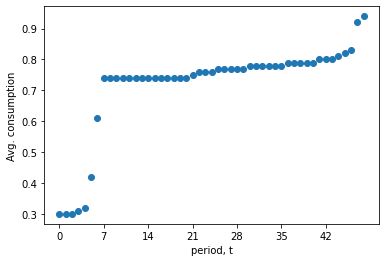

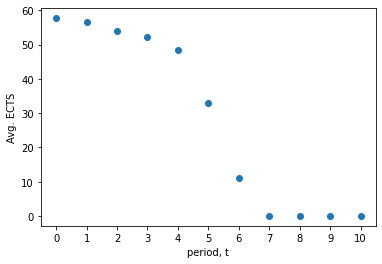

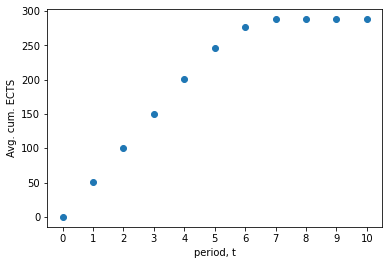

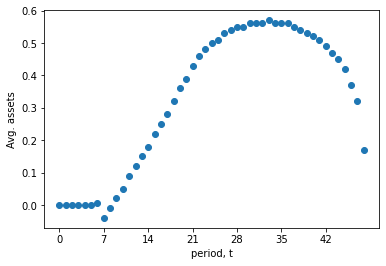

In [25]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(base_model_sim.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(base_model_sim.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(base_model_sim.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),sim_a_list)
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [31]:
np.sum(np.mean(base_model_sim.sim.V, axis=0))

-47.80830344011624

In [32]:
base_model_sim.sim.g[17,0:3]

array([55.330126, 54.920357, 56.554609])

# Statistics by type

In [33]:
time = np.zeros(par.Nm)

In [34]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(base_model_sim.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [35]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(base_model_sim.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(base_model_sim.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(base_model_sim.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(base_model_sim.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(base_model_sim.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-50.922691 -48.731843 -47.303356 -46.379791 -45.739924]


## Average completion time

In [36]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if base_model_sim.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(base_model_sim.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.537817 6.189934 5.680877 5.31655 ]


# Average completed ECTS points

In [37]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(base_model_sim.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(base_model_sim.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(base_model_sim.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(base_model_sim.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(base_model_sim.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[254.13159  290.983385 296.342096 298.955629 299.82184 ]


## How many: drop out, bachelors degree, masters degree

In [38]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [39]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [40]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[17.612269446672013, 4.858666130167991, 2.038152610441767, 0.5797680927628949, 0.09882399446585631]
[10.735765838011227, 0.3118398551453576, 0.010040160642570281, 0.0, 0.0]
[71.65196471531677, 94.82949401468666, 97.95180722891567, 99.4202319072371, 99.90117600553414]


<AxesSubplot:xlabel='Type', ylabel='Share'>

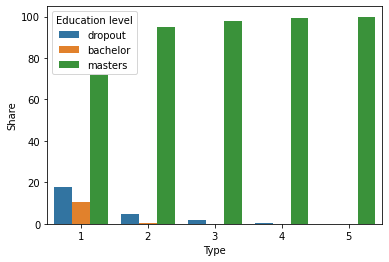

In [41]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

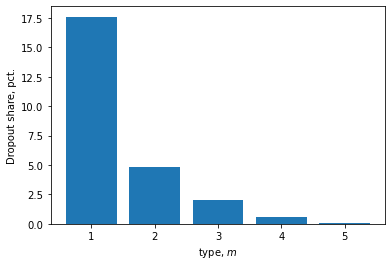

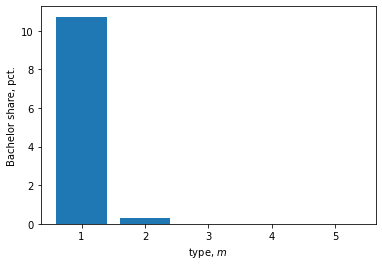

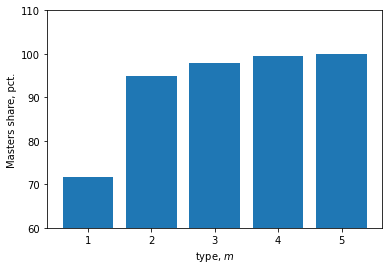

In [42]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [43]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = base_model_sim.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [44]:
slutloan

array([73.285886, 51.202092, 18.604418,  4.918033,  0.543532])

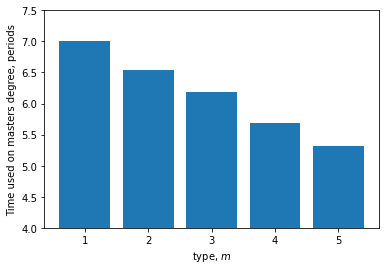

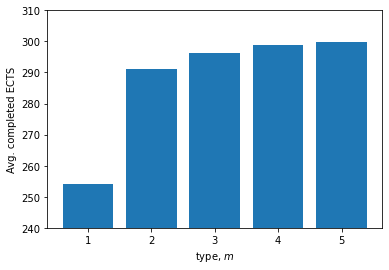

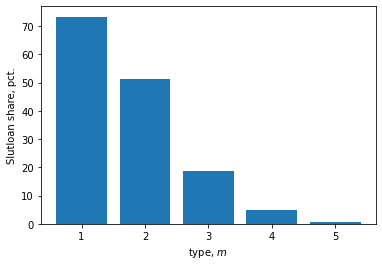

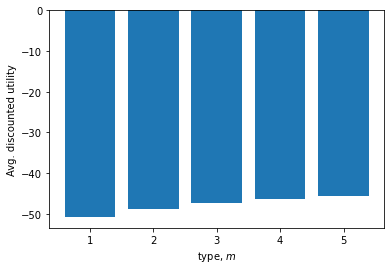

In [45]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

# 2025 reform

Finding optimal tax

In [173]:
# def zero_budget(tax):
#     model_reform1 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':4,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     model_reform1.solve()
#     model_reform1.sim.a_init[:]=0.0
#     model_reform1.sim.e_init[:]=0.0
#     model_reform1.simulate()
#     return ((np.sum(0.4*np.mean(model_reform1.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(model_reform1.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res1 = optimize.root_scalar(zero_budget, bracket=[0.2, 0.45], method='brentq')

In [174]:
#print(res1)

In [175]:
#reform_2024 = print(res1.root)

Loading model with unchanged budget tax

In [176]:
model_reform1 = SimpleBreakdownModelClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':4,'tax':0.33655168865727547,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

In [177]:
par = model_reform1.par
sol = model_reform1.sol
sim = model_reform1.sim

In [178]:
%time model_reform1.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 28s, sys: 9.35 s, total: 8min 37s
Wall time: 8min 56s


In [235]:
model_reform1.sim.a_init[:] = 0.0
model_reform1.sim.e_init[:] = 0
model_reform1.simulate()

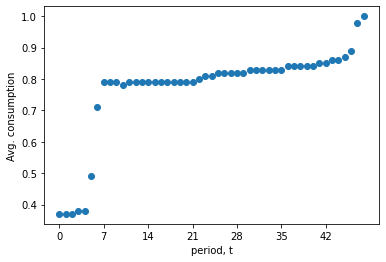

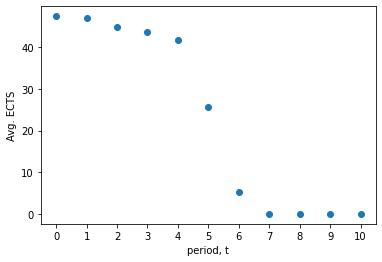

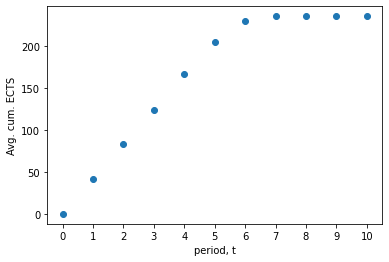

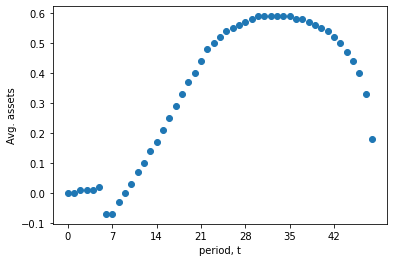

In [356]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_reform1.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_reform1.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(model_reform1.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(model_reform1.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [46]:
np.sum(np.mean(model_reform1.sim.V, axis=0))

NameError: name 'model_reform1' is not defined

## Types

In [357]:
time = np.zeros(par.Nm)

In [358]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(model_reform1.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(model_reform1.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(model_reform1.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(model_reform1.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(model_reform1.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(model_reform1.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.836199 -47.821163 -47.81598  -47.836073 -47.812346]


## Average completion time

In [359]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if model_reform1.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(model_reform1.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


/var/folders/px/z35hgh2x6ylc7w2zhq03f5fr0000gn/T/ipykernel_809/2757153994.py:10: RuntimeWarning: Mean of empty slice
  time[0] = np.nanmean(study_0)


[     nan 6.570339 6.188859 5.664431 5.289976]


# Average completed ECTS points

In [360]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(model_reform1.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(model_reform1.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(model_reform1.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(model_reform1.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(model_reform1.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[  0.       287.768023 296.402464 298.686678 299.7899  ]


## How many: drop out, bachelors degree, masters degree

In [361]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [362]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [363]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[100.0, 6.44492696407422, 2.0472924557273005, 0.764951321279555, 0.1203852327447833]
[0.0, 0.3947887879984209, 0.010236462278636504, 0.0, 0.0]
[0.0, 93.16028424792736, 97.94247108199407, 99.23504867872045, 99.87961476725522]


<AxesSubplot:xlabel='Type', ylabel='Share'>

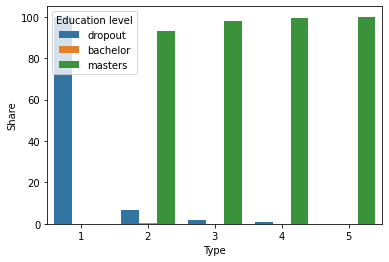

In [364]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

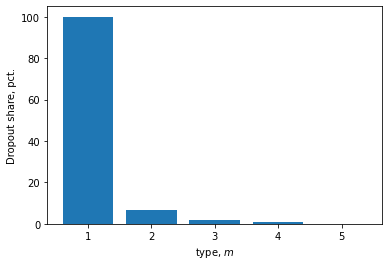

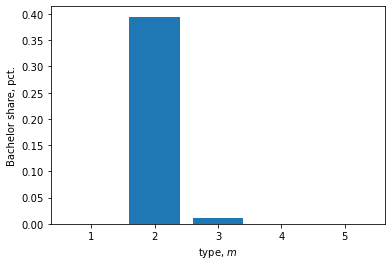

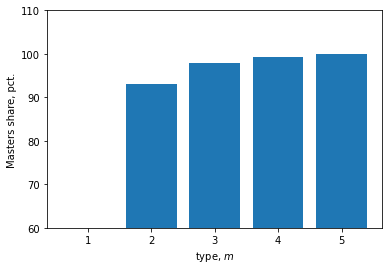

In [245]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [365]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = model_reform1.sim.g[i,par.t_ls-1]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [366]:
slutloan

array([ 0.      , 93.535334, 97.952708, 61.255712, 28.451043])

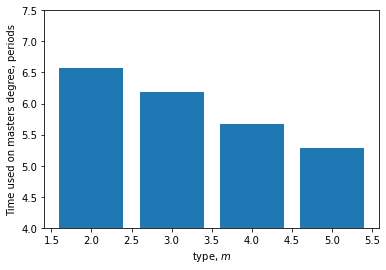

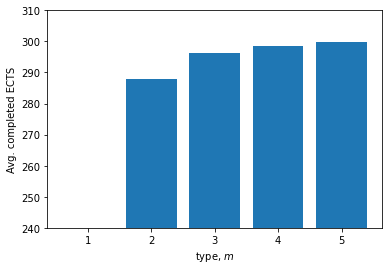

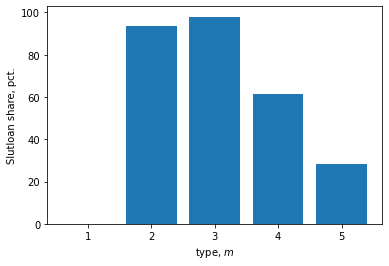

In [367]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');


# Ingen SU på kandidaten

In [181]:
from ingen_su_kandidat import IngenSUKandidatClass

In [182]:
# def zero_budget2(tax):
#     ingen_su_model = IngenSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     ingen_su_model.solve()
#     ingen_su_model.sim.a_init[:]=0.0
#     ingen_su_model.sim.e_init[:]=0.0
#     ingen_su_model.simulate()
#     return ((np.sum(0.4*np.mean(ingen_su_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(ingen_su_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res2 = optimize.root_scalar(zero_budget2, bracket=[0.1, 0.5], method='brentq')

In [183]:
#print(res2)

In [184]:
ingen_su_model = IngenSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.2822603859032937,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = ingen_su_model.par
sol = ingen_su_model.sol
sim = ingen_su_model.sim

In [185]:
%time ingen_su_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 34s, sys: 9.74 s, total: 8min 43s
Wall time: 9min 5s


In [186]:
ingen_su_model.sim.a_init[:] = 0.0
ingen_su_model.sim.e_init[:] = 0
ingen_su_model.simulate()

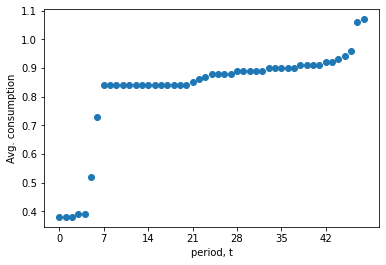

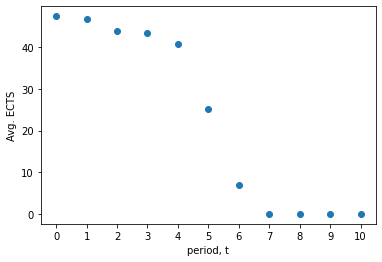

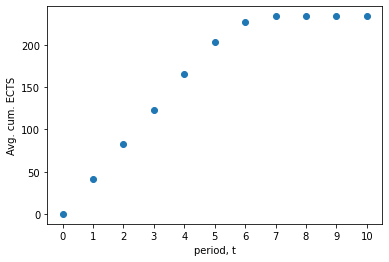

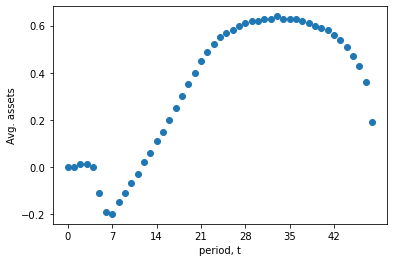

In [187]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(ingen_su_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(ingen_su_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(ingen_su_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(ingen_su_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [ ]:
np.sum(np.mean(ingen_su_model.sim.V, axis=0))

## Types

In [346]:
time = np.zeros(par.Nm)

In [347]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(ingen_su_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(ingen_su_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.836199 -47.821163 -47.81598  -47.836073 -47.812346]


## Average completion time

In [348]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if ingen_su_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(ingen_su_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


/var/folders/px/z35hgh2x6ylc7w2zhq03f5fr0000gn/T/ipykernel_809/1013530252.py:10: RuntimeWarning: Mean of empty slice
  time[0] = np.nanmean(study_0)


[     nan 6.785911 6.19963  5.663505 5.323848]


# Average completed ECTS points

In [349]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(ingen_su_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(ingen_su_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(ingen_su_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(ingen_su_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(ingen_su_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[  0.       275.273567 295.780417 298.429163 299.831376]


## How many: drop out, bachelors degree, masters degree

In [350]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [351]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [352]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[100.0, 9.396104531662914, 2.3680513746738914, 0.8695652173913043, 0.09009910901992192]
[0.0, 5.295096407947538, 0.02006823198876179, 0.0, 0.0]
[0.0, 85.30879906038955, 97.61188039333734, 99.1304347826087, 99.90990089098007]


<AxesSubplot:xlabel='Type', ylabel='Share'>

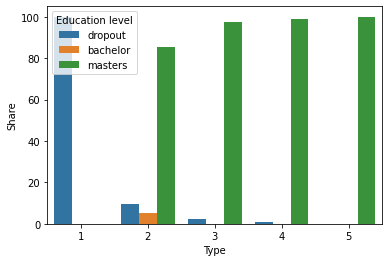

In [256]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

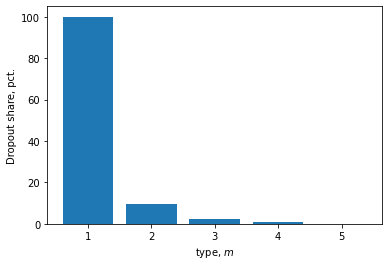

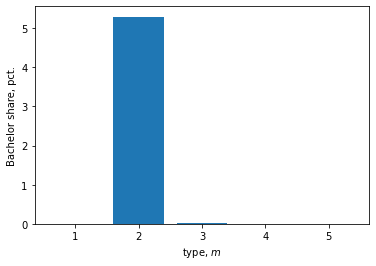

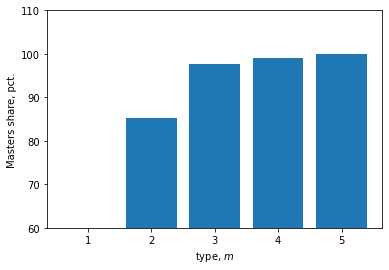

In [257]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [353]:
# slutloan = np.zeros(par.Nm)

# #type 0
# slutloan_0 = np.zeros(len(m_0))

# for idx, i in enumerate(m_0):
#         slutloan_0[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

# #type 1
# slutloan_1 = np.zeros(len(m_1))

# for idx, i in enumerate(m_1):
#         slutloan_1[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

# #type 2
# slutloan_2 = np.zeros(len(m_2))

# for idx, i in enumerate(m_2):
#         slutloan_2[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

# #type 3
# slutloan_3 = np.zeros(len(m_3))

# for idx, i in enumerate(m_3):
#         slutloan_3[idx] = ingen_su_model.sim.g[i,par.t_ls]>0.000001

# slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

# #type 4
# slutloan_4 = np.zeros(len(m_4))

# for idx, i in enumerate(m_4):
#         slutloan_4[idx] = ingen_su_model.sim.g[i,par.t_ls-1]>0.000001

# slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [354]:
# slutloan

array([ 0.      , 86.542038, 97.631949, 61.233569, 31.744919])

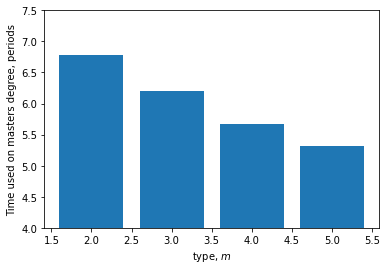

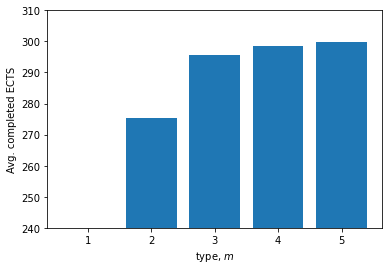

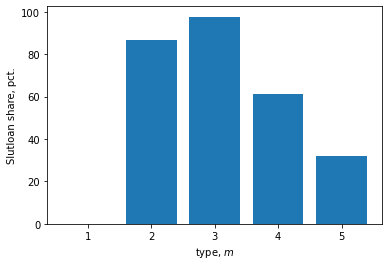

In [355]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

# fig, ax = plt.subplots()
# ax.bar(range(1,(par.Nm+1)),slutloan)
# ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');



# Højere SU på kandidaten

In [262]:
from dobbelt_su_kandidat import DobbeltSUKandidatClass

In [189]:
# def zero_budget3(tax):
#     dobbelt_su_model = DobbeltSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     dobbelt_su_model.solve()
#     dobbelt_su_model.sim.a_init[:]=0.0
#     dobbelt_su_model.sim.e_init[:]=0.0
#     dobbelt_su_model.simulate()
#     return ((np.sum(0.4*np.mean(dobbelt_su_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(dobbelt_su_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res3 = optimize.root_scalar(zero_budget3, bracket=[0.3, 0.7], method='brentq')

In [190]:
#print(res3)

In [191]:
dobbelt_su_model = DobbeltSUKandidatClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.6403186429088012,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = dobbelt_su_model.par
sol = dobbelt_su_model.sol
sim = dobbelt_su_model.sim

In [192]:
%time dobbelt_su_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 10min 12s, sys: 12.2 s, total: 10min 25s
Wall time: 11min 54s


In [193]:
dobbelt_su_model.sim.a_init[:] = 0.0
dobbelt_su_model.sim.e_init[:] = 0
dobbelt_su_model.simulate()

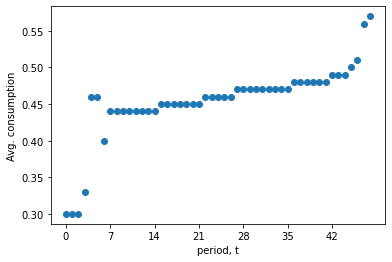

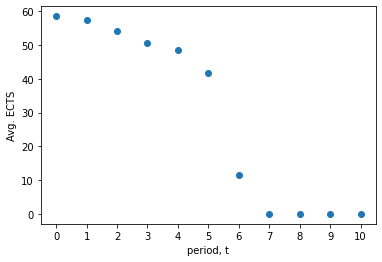

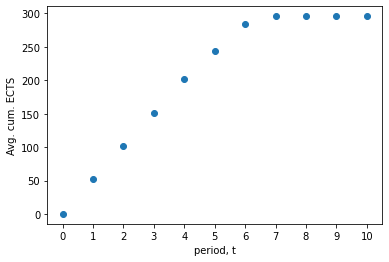

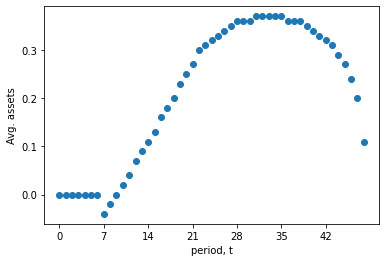

In [194]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(dobbelt_su_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(dobbelt_su_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(dobbelt_su_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(dobbelt_su_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [ ]:
np.sum(np.mean(dobbelt_su_model.sim.V, axis=0))

## Types

In [263]:
time = np.zeros(par.Nm)

In [265]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(dobbelt_su_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(dobbelt_su_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-45.705957 -45.762093 -45.740473 -45.811751 -45.766004]


## Average completion time

In [266]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if dobbelt_su_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(dobbelt_su_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[6.982034 6.428751 6.241823 6.04998  5.801656]


# Average completed ECTS points

In [267]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(dobbelt_su_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[288.774769 294.152766 296.982848 299.197908 299.856875]


## How many: drop out, bachelors degree, masters degree

In [268]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [269]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [270]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[5.791388720436628, 3.2411627671427126, 1.7111022682053323, 0.44869877355668564, 0.07880220646178093]
[1.3947847180109159, 0.16205813835713562, 0.04974134500596897, 0.0, 0.0]
[92.81382656155246, 96.59677909450015, 98.2391563867887, 99.55130122644331, 99.92119779353821]


<AxesSubplot:xlabel='Type', ylabel='Share'>

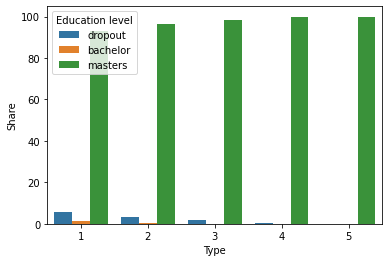

In [271]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

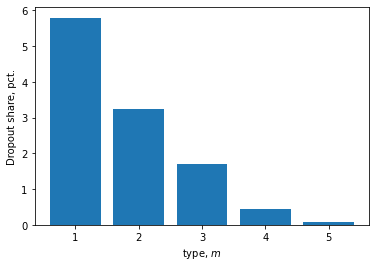

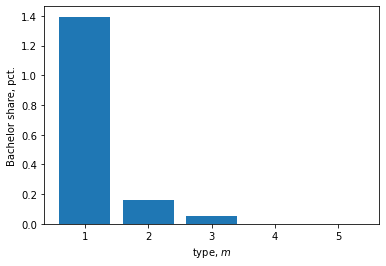

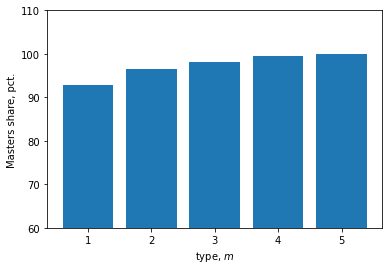

In [272]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [273]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = dobbelt_su_model.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [274]:
slutloan

array([91.772792, 41.497012, 23.796259,  4.975571,  0.935776])

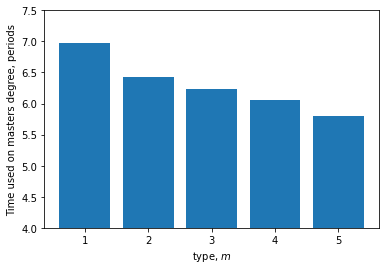

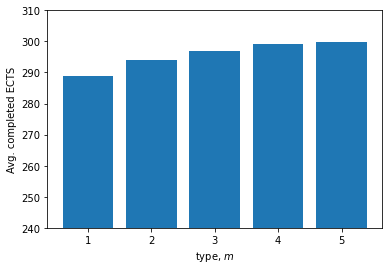

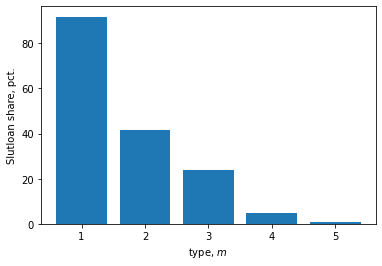

In [275]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');


# Kun SU til lave typer

In [195]:
from su_til_fattige import SUTilFattigeClass

In [196]:
# def zero_budget4(tax):
#     su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#     su_fattig_model.solve()
#     su_fattig_model.sim.a_init[:]=0.0
#     su_fattig_model.sim.e_init[:]=0.0
#     su_fattig_model.simulate()
#     return ((np.sum(0.4*np.mean(su_fattig_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(su_fattig_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res4 = optimize.root_scalar(zero_budget4, bracket=[0.2, 0.5], method='brentq')

In [197]:
# print(res4)

In [309]:
su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.23128738985933603,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})
#su_fattig_model = SUTilFattigeClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.4,'su':0.16,'sigma_s':0.3,'sigma_w':0.1})

par = su_fattig_model.par
sol = su_fattig_model.sol


In [310]:
sim = su_fattig_model.sim

In [311]:
%time su_fattig_model.solve()

48
47


46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 44s, sys: 5.29 s, total: 8min 49s
Wall time: 9min 49s


In [312]:
#su_fattig_model.sim.m_init[:] = 0
su_fattig_model.sim.a_init[:] = 0.0
su_fattig_model.sim.e_init[:] = 0
su_fattig_model.simulate()

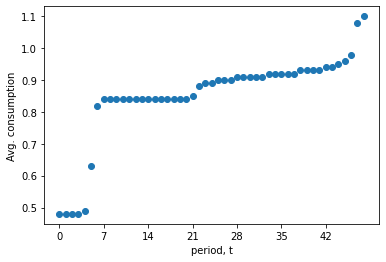

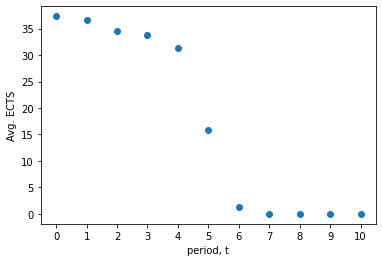

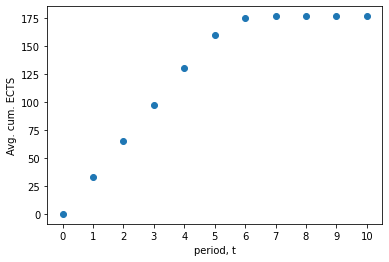

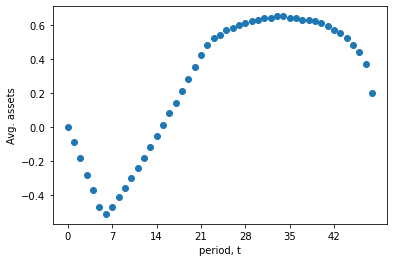

In [313]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(su_fattig_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(su_fattig_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(su_fattig_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(su_fattig_model.sim.a,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [ ]:
np.sum(np.mean(su_fattig_model.sim.V, axis=0))

## Types

In [370]:
time = np.zeros(par.Nm)

In [371]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(su_fattig_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(su_fattig_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-48.774378 -48.807008 -48.828484 -48.821379 -48.809201]


## Average completion time

In [372]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if su_fattig_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(su_fattig_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


/var/folders/px/z35hgh2x6ylc7w2zhq03f5fr0000gn/T/ipykernel_809/3972824477.py:10: RuntimeWarning: Mean of empty slice
  time[0] = np.nanmean(study_0)
/var/folders/px/z35hgh2x6ylc7w2zhq03f5fr0000gn/T/ipykernel_809/3972824477.py:21: RuntimeWarning: Mean of empty slice
  time[1] = np.nanmean(study_1)


[     nan      nan 6.185356 5.629566 5.306529]


# Average completed ECTS points

In [317]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(su_fattig_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(su_fattig_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(su_fattig_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(su_fattig_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(su_fattig_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[  0.         0.       284.941459 298.895903 299.869422]


## How many: drop out, bachelors degree, masters degree

In [318]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [319]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [320]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[100.0, 100.0, 2.851425712856428, 0.6368782854832188, 0.069617105917454]
[0.0, 0.0, 8.194097048524263, 0.0, 0.0]
[0.0, 0.0, 88.95447723861932, 99.36312171451678, 99.93038289408254]


<AxesSubplot:xlabel='Type', ylabel='Share'>

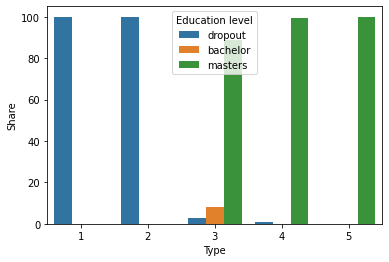

In [321]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

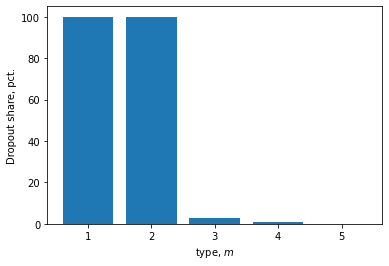

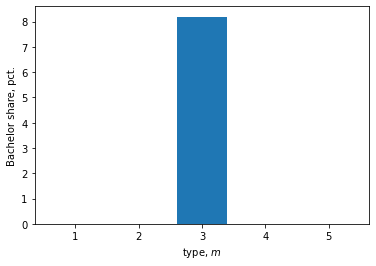

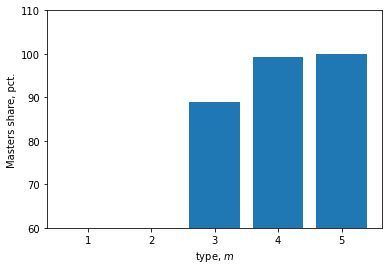

In [322]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [323]:
# slutloan = np.zeros(par.Nm)

# #type 0
# slutloan_0 = np.zeros(len(m_0))

# for idx, i in enumerate(m_0):
#         slutloan_0[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

# #type 1
# slutloan_1 = np.zeros(len(m_1))

# for idx, i in enumerate(m_1):
#         slutloan_1[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

# #type 2
# slutloan_2 = np.zeros(len(m_2))

# for idx, i in enumerate(m_2):
#         slutloan_2[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

# #type 3
# slutloan_3 = np.zeros(len(m_3))

# for idx, i in enumerate(m_3):
#         slutloan_3[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

# #type 4
# slutloan_4 = np.zeros(len(m_4))

# for idx, i in enumerate(m_4):
#         slutloan_4[idx] = su_fattig_model.sim.g[i,par.t_ls]>0.000001

# slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [324]:
# slutloan

array([ 0.      ,  0.      , 16.528264,  4.104327,  0.626554])

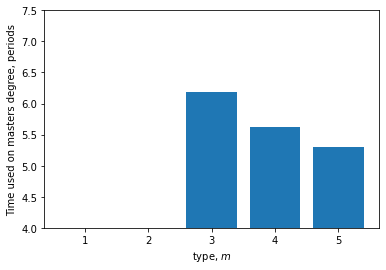

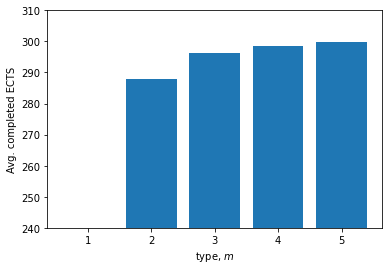

In [373]:
time[0:1] = 0

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

# fig, ax = plt.subplots()
# ax.bar(range(1,(par.Nm+1)),slutloan)
# ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');



# Højere varians for lavtuddannede

In [203]:
from varians_lavtuddannede import VariansLavtuddClass

In [204]:
# def zero_budget5(tax):
#     varians_lavtudd_model = VariansLavtuddClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':tax,'su':0.16,'sigma_s':0.3})
#     varians_lavtudd_model.solve()
#     varians_lavtudd_model.sim.a_init[:]=0.0
#     varians_lavtudd_model.sim.e_init[:]=0.0
#     varians_lavtudd_model.simulate()
#     return ((np.sum(0.4*np.mean(varians_lavtudd_model.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(varians_lavtudd_model.sim.su[:,:-1],axis=0))))-(np.sum(0.4*np.mean(base_model_sim.sim.income[:,:-1],axis=0)) - (np.sum(np.mean(base_model_sim.sim.su[:,:-1],axis=0)))))

# res5 = optimize.root_scalar(zero_budget5, bracket=[0.3, 0.5], method='brentq')

In [205]:
# print(res5)

In [206]:
varians_lavtudd_model = VariansLavtuddClass(par={'r':0.02,'beta':0.98,'Nm':5,'upsilon':1.05,'rho':12.0,'gamma_max':0.012,'gamma_min':0.019,'tau':5,'tax':0.3582459037088033,'su':0.16,'sigma_s':0.3})

par = varians_lavtudd_model.par
sol = varians_lavtudd_model.sol
sim = varians_lavtudd_model.sim

In [207]:
%time varians_lavtudd_model.solve()

48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
48
47
46
45
44
43
42
41
40
39
38
37
36
35
34
33
32
31
30
29
28
27
26
25
24
23
22
21
20
19
18
17
16
15
14
13
12
11
10
9
8
7
6
5
4
3
2
1
0
CPU times: user 8min 42s, sys: 10.5 s, total: 8min 53s
Wall time: 9min 16s


In [326]:
varians_lavtudd_model.sim.a_init[:] = 0.0
varians_lavtudd_model.sim.e_init[:] = 0
varians_lavtudd_model.simulate()

In [327]:
sim_a_list_2 = np.mean(varians_lavtudd_model.sim.a,axis=0)
sim_a_list_2[5] = sim_a_list_2[4]

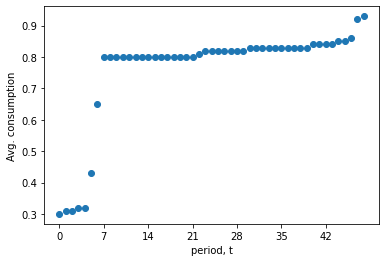

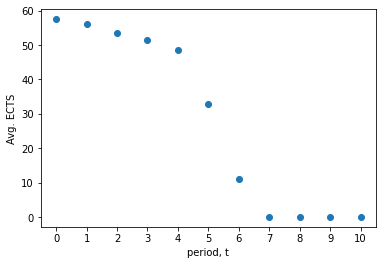

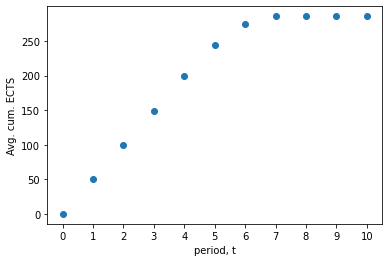

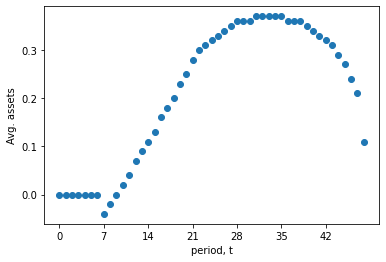

In [328]:
#Simulation graphs
fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(np.mean(varians_lavtudd_model.sim.c,axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. consumption',xticks=range(0,par.simT,7));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(varians_lavtudd_model.sim.g[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.t_ls+5),np.around(np.mean(varians_lavtudd_model.sim.G[:,0:par.t_ls+5],axis=0),decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. cum. ECTS',xticks=range(par.t_ls+5));

fig, ax = plt.subplots()
ax.scatter(range(par.simT),np.around(sim_a_list_2,decimals=2))
ax.set(xlabel='period, t',ylabel='Avg. assets',xticks=range(0,par.simT,7));

## Avg. utility

In [ ]:
np.sum(np.mean(varians_lavtudd_model.sim.V, axis=0))

## Types

In [329]:
time = np.zeros(par.Nm)

In [330]:
m_0 = []
m_1 = []
m_2 = []
m_3 = []
m_4 = []

for i_idx, i in enumerate(varians_lavtudd_model.sim.m_init):
    
    if i == 0:
        m_0.append(i_idx)
    
    if i == 1:
        m_1.append(i_idx)
    
    if i == 2:
        m_2.append(i_idx)
    
    if i == 3:
        m_3.append(i_idx)
    
    if i == 4:
        m_4.append(i_idx)


In [ ]:
utility = np.zeros(par.Nm)

util_0 = []
for i in m_0:
    util_0.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[0] = np.mean(util_0)

util_1 = []
for i in m_1:
    util_1.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[1] = np.mean(util_1)

util_2 = []
for i in m_2:
    util_2.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[2] = np.mean(util_2)

util_3 = []
for i in m_3:
    util_3.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[3] = np.mean(util_3)

util_4 = []
for i in m_4:
    util_4.append(np.sum(varians_lavtudd_model.sim.V[i,:]))

utility[4] = np.mean(util_4)

print(utility)



[-47.747357 -47.734034 -47.760803 -47.775642 -47.753959]


## Average completion time

In [331]:
#type 0
study_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_0[idx] = np.NaN
        else:
                study_0[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[0] = np.nanmean(study_0)

#type 1
study_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_1[idx] = np.NaN
        else:
                study_1[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[1] = np.nanmean(study_1)

#type 2
study_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_2[idx] = np.NaN
        else:
                study_2[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[2] = np.nanmean(study_2)

#type 3
study_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_3[idx] = np.NaN
        else:
                study_3[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[3] = np.nanmean(study_3)

#type 4
study_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        if varians_lavtudd_model.sim.G[i,par.T-1] < 299:
                study_4[idx] = np.NaN
        else:
                study_4[idx] = np.sum(varians_lavtudd_model.sim.g[i,:]>0.000001)

time[4] = np.nanmean(study_4)

print(time)


[7.       6.539341 6.196899 5.676292 5.313936]


# Average completed ECTS points

In [332]:
ects = np.zeros(par.Nm)

list_0 = []
for i in m_0:
    list_0.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[0] = np.mean(list_0)

list_1 = []
for i in m_1:
    list_1.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[1] = np.mean(list_1)

list_2 = []
for i in m_2:
    list_2.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[2] = np.mean(list_2)

list_3 = []
for i in m_3:
    list_3.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[3] = np.mean(list_3)

list_4 = []
for i in m_4:
    list_4.append(varians_lavtudd_model.sim.G[i,par.T-1])

ects[4] = np.mean(list_4)

print(ects)



[243.983533 290.026428 296.32282  298.765784 299.869791]


## How many: drop out, bachelors degree, masters degree

In [333]:
dropout_0=0
dropout_1=0
dropout_2=0
dropout_3=0
dropout_4=0

bachelor_0=0
bachelor_1=0
bachelor_2=0
bachelor_3=0
bachelor_4=0

masters_0=0
masters_1=0
masters_2=0
masters_3=0
masters_4=0

In [334]:
dropout_counts = []
bachelor_counts = []
masters_counts = []

for lst, dropout_count, bachelor_count, masters_count in zip([list_0, list_1, list_2, list_3, list_4], 
                                                              [dropout_0, dropout_1, dropout_2, dropout_3, dropout_4], 
                                                              [bachelor_0, bachelor_1, bachelor_2, bachelor_3, bachelor_4], 
                                                              [masters_0, masters_1, masters_2, masters_3, masters_4]):
    dropout_counts.append(dropout_count)
    bachelor_counts.append(bachelor_count)
    masters_counts.append(masters_count)

    for i in lst:
        if i < par.bachelor:
            dropout_counts[-1] += 1
        if par.bachelor <= i < par.complete - 1e-5:
            bachelor_counts[-1] += 1
        if par.complete-1e-5<=i:
            masters_counts[-1] += 1

dropout_shares = [count / len(lst) * 100 for count, lst in zip(dropout_counts, [list_0, list_1, list_2, list_3, list_4])]
bachelor_shares = [count / len(lst) * 100 for count, lst in zip(bachelor_counts, [list_0, list_1, list_2, list_3, list_4])]
masters_shares = [count / len(lst) * 100 for count, lst in zip(masters_counts, [list_0, list_1, list_2, list_3, list_4])]

In [335]:
print(dropout_shares)
print(bachelor_shares)
print(masters_shares)

[22.221127315727237, 5.350903464111012, 2.058353317346123, 0.6942348324781165, 0.07079288025889968]
[7.883326763894363, 0.3893381251871818, 0.0, 0.0, 0.0]
[69.8955459203784, 94.2597584107018, 97.94164668265388, 99.30576516752188, 99.92920711974111]


<AxesSubplot:xlabel='Type', ylabel='Share'>

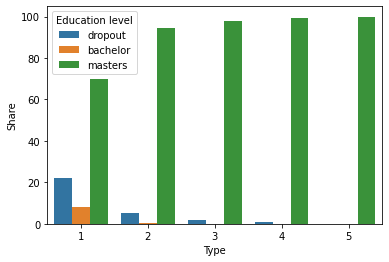

In [336]:
stats_df = pd.DataFrame(data=[dropout_shares, bachelor_shares, masters_shares], columns=['1', '2', '3', '4', '5'], index=['dropout', 'bachelor', 'masters'])

stats_df_long = stats_df.reset_index().melt(id_vars='index', var_name='category', value_name='value')

# Rename the columns
stats_df_long.columns = ['Education level', 'Type', 'Share']

# Plot the data
sns.barplot(data=stats_df_long, x='Type', y='Share', hue='Education level')

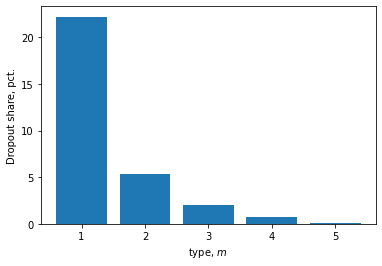

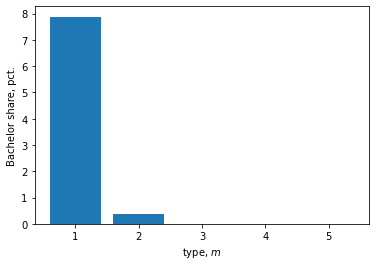

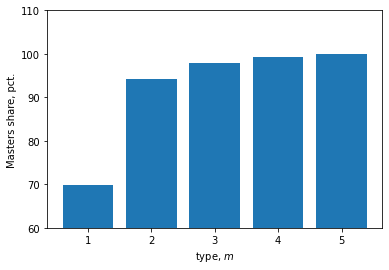

In [337]:
#Seperate plots

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),dropout_shares)
ax.set(xlabel='type, $m$',ylabel='Dropout share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),bachelor_shares)
ax.set(xlabel='type, $m$',ylabel='Bachelor share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),masters_shares)
ax.set(xlabel='type, $m$',ylabel='Masters share, pct.')
ax.set_ylim(60,110);

## How many takes slutloans?


In [338]:
slutloan = np.zeros(par.Nm)

#type 0
slutloan_0 = np.zeros(len(m_0))

for idx, i in enumerate(m_0):
        slutloan_0[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[0] = np.sum(slutloan_0)/len(m_0)*100

#type 1
slutloan_1 = np.zeros(len(m_1))

for idx, i in enumerate(m_1):
        slutloan_1[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[1] = np.sum(slutloan_1)/len(m_1)*100

#type 2
slutloan_2 = np.zeros(len(m_2))

for idx, i in enumerate(m_2):
        slutloan_2[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[2] = np.sum(slutloan_2)/len(m_2)*100

#type 3
slutloan_3 = np.zeros(len(m_3))

for idx, i in enumerate(m_3):
        slutloan_3[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[3] = np.sum(slutloan_3)/len(m_3)*100

#type 4
slutloan_4 = np.zeros(len(m_4))

for idx, i in enumerate(m_4):
        slutloan_4[idx] = varians_lavtudd_model.sim.g[i,par.t_ls]>0.000001

slutloan[4] = np.sum(slutloan_4)/len(m_4)*100

In [339]:
slutloan

array([71.521482, 51.05321 , 19.284572,  4.587987,  0.455097])

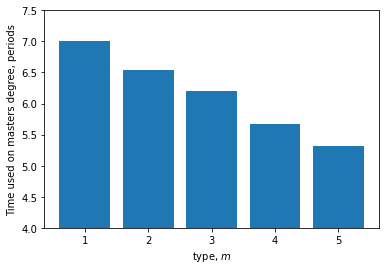

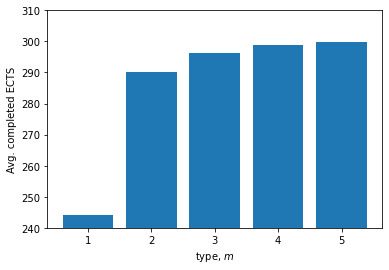

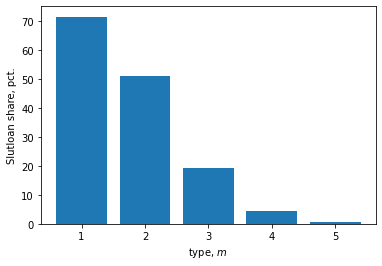

In [340]:
fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),time,bottom=0)
ax.set(xlabel='type, $m$',ylabel='Time used on masters degree, periods')
ax.set_ylim([4, 7.5]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),ects)
ax.set(xlabel='type, $m$',ylabel='Avg. completed ECTS')
ax.set_ylim([240, 310]);

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),slutloan)
ax.set(xlabel='type, $m$',ylabel='Slutloan share, pct.');

fig, ax = plt.subplots()
ax.bar(range(1,(par.Nm+1)),utility)
ax.set(xlabel='type, $m$',ylabel='Avg. discounted utility');

